## Single Input, Multiple Outputs

Graph (The Complete workflow structure) -->  State (data shared across the workflow) --> Nodes (Steps that mopdify the state)  --> Edges (connections between nodes)

In [1]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph # frame that helps you design and mange the flow of tasks in your application using a graph 

In [ ]:
# We now create an Agentstate- shared data structure that keeps track of infomation as your application runs
# state Schema
class AgentState(TypedDict):
    message : str

def greeting_node(state: AgentState):
    """Simple node that adds a greeting message to the state"""

    state["message"] = "Hey " + state["message"] + " , how is your day going?"
    return state


In [3]:
graph = StateGraph(AgentState)
graph.add_node("greeter", greeting_node)

graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app =graph.compile()

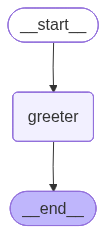

In [4]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [5]:
result = app.invoke({"message": "Bob"})
result["message"]

'Hey Bob , how is your day going?'

## Graph multiple inputs

In [6]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph 


In [7]:
class AgentState(TypedDict):
    name : str
    values: List[int]
    result : str

def process_values_node(state: AgentState):
    """This function accepts multiple values from the state and processes them"""
    state["result"] = f"Hi there {state['name']}, the sum of your values is {sum(state['values'])}"
    return state
 


In [8]:
graph_2 = StateGraph(AgentState)
graph_2.add_node("processor", process_values_node)  
graph_2.set_entry_point("processor")
graph_2.set_finish_point("processor") 
app_2 = graph_2.compile()


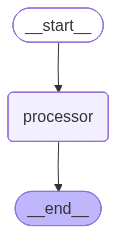

In [9]:
from langgraph.graph import StateGraph
from IPython.display import display, Image  
display(Image(app_2.get_graph().draw_mermaid_png()))

In [10]:
aapp_result = app_2.invoke({"name": "Alice", "values": [10, 20, 30]})
aapp_result["result"]

'Hi there Alice, the sum of your values is 60'

## Graph 3 --> Sequential Graphs with multiple nodes

In [11]:
from typing import  TypedDict, List
from langgraph.graph import StateGraph
class AgentState(TypedDict):
    name : str
    age: int  
    result : str


def first_node(state: AgentState):
    """This first node creates a greeting message based on name"""
    state["result"] = f"Hello {state['name']}"
    return state
def second_node(state: AgentState):
    """This second node appends age information to the greeting message"""
    state["result"] += f", you are {state['age']} years old."
    return state


In [12]:
graph = StateGraph(AgentState)
graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_edge("first_node", "second_node")
graph.set_entry_point("first_node")
graph.set_finish_point("second_node")  

app = graph.compile()

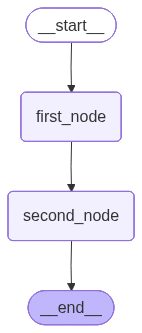

In [13]:
from IPython.display import display, Image  
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
app_result = app.invoke({"name": "Charlie", "age": 28})
app_result["result"]

'Hello Charlie, you are 28 years old.'